Project Steps:

---Collecting ways of data 
1-Buying data from third part vendor
2-Collecting and annotate data on your own
3-Writing white web script that takes datas from internet

The ready to use data that we found from kaggle: https://www.kaggle.com/datasets/arjuntejaswi/plant-village (344mb)
But we just use 3 data files for our project;
-Potato_Early_blight
-Potato_Healthy
-Potato_Late_blight

---Load data into tf.Dataset
---Data visualization

-Train test split
-Data augmentation


In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [36]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
    
)

Found 2152 files belonging to 3 classes.


In [13]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [15]:
len(dataset), 68*32

(68, 2176)

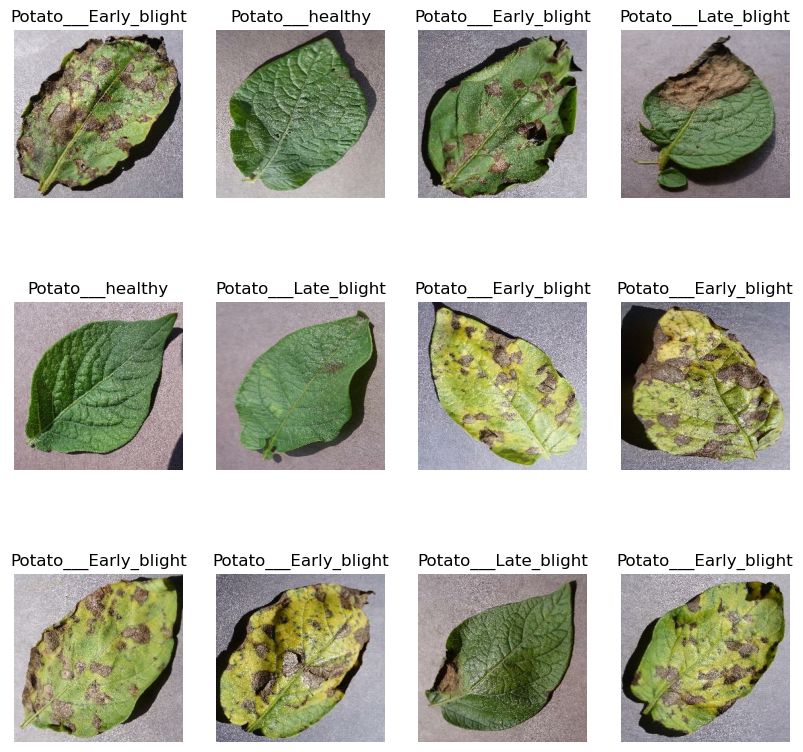

In [35]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [37]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [43]:
train_ds = dataset.take(54)
len(train_Dataset)

54

In [45]:
test_ds = dataset.skip(54) 
len(test_ds)

14

In [46]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [48]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [49]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [53]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
         
    train_size = int(train_split*ds_size)
    
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds =ds.skip(train_size).take(val_size)
    val_ds =ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [54]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [55]:
len(train_ds)

54

In [56]:
len(val_ds)

8

In [57]:
len(test_ds)

8

In [61]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)    
])

In [65]:
tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)   
])

18/12/2023 
-Collecting Data from Web
-Load data into tf.Dataset
-Data visualization